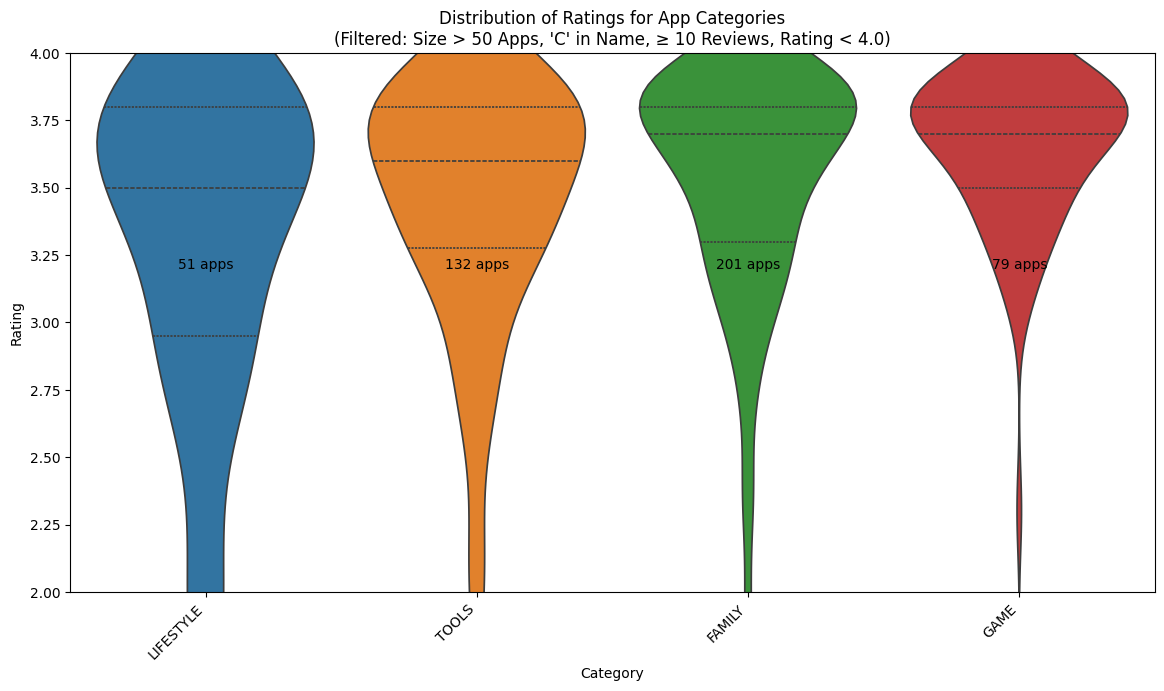


**Filtered Categories and Example Apps**
📌 LIFESTYLE: HTC Speak, Caf - My Account, Family convenience store FamilyMart
📌 TOOLS: My Telcel, Clear, Sound Recorder: Recorder & Voice Changer Free
📌 FAMILY: Coloring book moana, Dr. Panda Town: Vacation, Montessori Preschool
📌 GAME: Race the Traffic Moto, Will it Crush?, Real City Car Driver


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz


file_path = "Play Store Data.csv"
df = pd.read_csv(file_path)


df.columns = df.columns.str.strip().str.lower()


df = df.dropna(subset=['rating', 'reviews', 'app', 'category'])


df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


df = df.dropna(subset=['reviews', 'rating'])


filtered_df = df[(df['rating'] < 4.0) &  # Ratings below 4.0
                 (df['reviews'] >= 10) &  # At least 10 reviews
                 (df['app'].astype(str).str.contains('C', case=False, na=False))]  # App name contains "C"


category_counts = filtered_df['category'].value_counts()


valid_categories = category_counts[category_counts > 50].index
filtered_df = filtered_df[filtered_df['category'].isin(valid_categories)]

# Get current IST time
ist = pytz.timezone("Asia/Kolkata")
current_time = datetime.now(ist).time()
start_time = datetime.strptime("16:00", "%H:%M").time()
end_time = datetime.strptime("18:00", "%H:%M").time()
ST
if start_time <= current_time <= end_time and not filtered_df.empty:
    plt.figure(figsize=(14, 7)

    
    sorted_categories = filtered_df.groupby("category")["rating"].median().sort_values().index
    filtered_df["category"] = pd.Categorical(filtered_df["category"], categories=sorted_categories, ordered=True)

    
    sns.violinplot(x="category", y="rating", data=filtered_df, inner="quartile", hue="category", legend=False)

    
    category_counts = filtered_df["category"].value_counts()
    for i, category in enumerate(sorted_categories):
        count = category_counts.get(category, 0)
        plt.text(i, 3.2, f"{count} apps", ha="center", fontsize=10, color="black")

    
    plt.xticks(rotation=45, ha="right")
    plt.title("Distribution of Ratings for App Categories\n(Filtered: Size > 50 Apps, 'C' in Name, ≥ 10 Reviews, Rating < 4.0)")
    plt.xlabel("Category")
    plt.ylabel("Rating")
    plt.ylim(2.0, 4.0)  

    plt.show()

    # Print filtered categories and example apps
    print("\n**Filtered Categories and Example Apps**")
    for category in sorted_categories:
        example_apps = filtered_df[filtered_df["category"] == category]["app"].head(3).tolist()
        print(f"📌 {category}: {', '.join(example_apps)}")

else:
    print("Graph can only be displayed between 4 PM IST to 6 PM IST or no valid data available.")
